In [129]:
from deap import creator, base, tools, algorithms
import numpy as np
import matplotlib.pyplot as plt

In [130]:
toolbox = base.Toolbox()
 
#genes, ou numero de cidades percorridas
n = 4

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("individuo", list, fitness=creator.FitnessMin)

toolbox.register("Genes", np.random.permutation, n)
toolbox.register("Individuos", tools.initIterate, creator.individuo, toolbox.Genes)


In [131]:
toolbox.register("Populacao", tools.initRepeat, list, toolbox.Individuos)

In [132]:
pop = toolbox.Populacao(n=5)

In [133]:
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3) 

In [134]:
distancias =   [[0, 7, 9 ,2], 
                [4, 0, 3, 7],
                [6, 7, 0, 8],
                [2, 3, 8, 0]]

In [135]:
def aptidao(individual):
    distancia = 0
    for i in range(n-1):
        distancia += distancias[individual[i]][individual[i+1]]
        #print(f"{[individual[i]]},{[individual[i+1]]}")
    return distancia,  

In [136]:
toolbox.register("evaluate", aptidao)

In [137]:
def estatisticaSalvar(individiuo):
    return individiuo.fitness.values

In [138]:
estatistica = tools.Statistics(key=estatisticaSalvar)
estatistica.register("mean", np.mean)
estatistica.register("min", np.min)
estatistica.register("max", np.max)

In [139]:
hof = tools.HallOfFame(5)

In [140]:
result, log = algorithms.eaSimple(pop, 
                                  toolbox, 
                                  cxpb=0.8, 
                                  mutpb=0.1, 
                                  ngen=50, 
                                  stats=estatistica, 
                                  halloffame=hof, 
                                  verbose=True)

gen	nevals	mean	min	max
0  	5     	16.2	12 	21 
1  	2     	13.6	11 	18 
2  	4     	12.2	11 	14 
3  	4     	15.8	12 	21 
4  	4     	13.8	12 	19 
5  	5     	12  	12 	12 
6  	4     	12  	12 	12 
7  	4     	12  	12 	12 
8  	2     	12  	12 	12 
9  	0     	12  	12 	12 
10 	4     	12  	12 	12 
11 	2     	12  	12 	12 
12 	4     	12  	12 	12 
13 	2     	12  	12 	12 
14 	4     	12  	12 	12 
15 	4     	13.4	12 	19 
16 	4     	12  	12 	12 
17 	4     	12  	8  	16 
18 	2     	9.6 	8  	12 
19 	4     	8.8 	8  	12 
20 	0     	8   	8  	8  
21 	4     	8   	8  	8  
22 	2     	8   	8  	8  
23 	2     	8   	8  	8  
24 	2     	8   	8  	8  
25 	4     	10  	8  	18 
26 	4     	8   	8  	8  
27 	4     	8   	8  	8  
28 	4     	8.8 	8  	12 
29 	5     	10.8	8  	22 
30 	4     	8   	8  	8  
31 	4     	9.4 	8  	15 
32 	4     	8   	8  	8  
33 	2     	8   	8  	8  
34 	4     	8   	8  	8  
35 	4     	9.4 	8  	15 
36 	4     	8   	8  	8  
37 	4     	8   	8  	8  
38 	2     	8   	8  	8  
39 	4     	8   	8  	8  
40 	4     	8   	

In [141]:
print(result)

[[0, 3, 1, 2], [0, 3, 1, 2], [0, 3, 1, 2], [0, 3, 1, 2], [0, 3, 1, 2]]


In [142]:
print(hof)

[[0, 3, 1, 2], [2, 0, 3, 1], [3, 0, 1, 2], [1, 2, 3, 0], [1, 0, 3, 2]]


In [143]:
menores = log.select('min')
maiores = log.select('max')
media = log.select('mean')

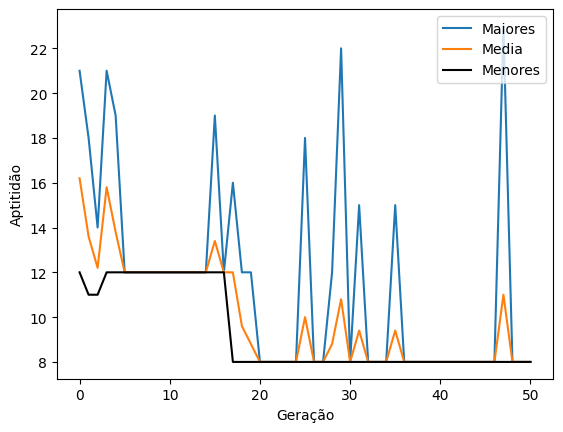

In [144]:
plt.plot(maiores, label="Maiores")
plt.plot(media, label="Media") 
plt.plot(menores, color="black", label="Menores")

plt.xlabel("Geração")
plt.ylabel("Aptitidão")
plt.legend(loc=1)